In [1]:
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'
import os; os.chdir("../src")

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Generation

In [3]:
import network_generator.ba_asymmetric_mixing
import assortativity

In [4]:
N = 500
f_0 = 0.3

In [5]:
hss_00 = np.random.rand(200)
hss_11 = np.random.rand(200)

In [6]:
all_values_h_00_r = []
all_values_h_11_r = []
for g_h_00, g_h_11 in zip(hss_00, hss_11):
    
    N = N
    m = 2
    h_00 = g_h_00
    h_11 = g_h_11
    G = network_generator.ba_asymmetric_mixing.generate(N, m, f_0, h_00, h_11)

    h_00, h_11 = assortativity.estimate_h_ba(G, power_law_xmin=2)
    all_values_h_00_r.append((g_h_00, h_00))
    all_values_h_11_r.append((g_h_11, h_11))

In [7]:
from sklearn.metrics import mean_squared_error
mean_squared_error(*zip(*all_values_h_00_r)), mean_squared_error(*zip(*all_values_h_11_r))

(0.0026773547745492093, 0.0011796851422760026)

In [8]:
minority_color = "#1FB88A"
majority_color = "#3B6689"

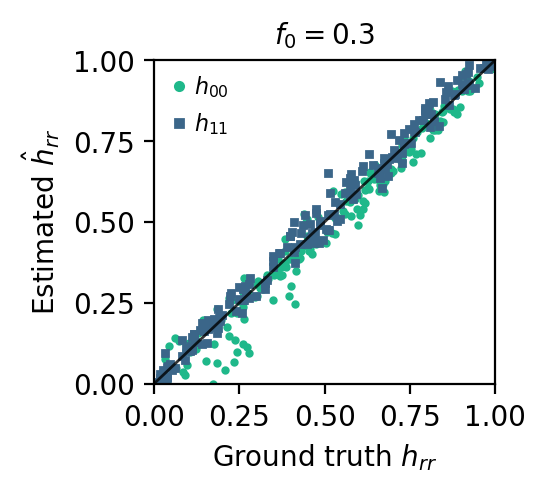

In [9]:
plt.figure(figsize=(2.2, 2.1))
plt.plot(*zip(*all_values_h_00_r), ls="", marker="o", ms=2, color=minority_color, mec=minority_color, label=r"$h_{00}$")
plt.plot(*zip(*all_values_h_11_r), ls="", marker="s", ms=2, color=majority_color, mec=majority_color, label=r"$h_{11}$")
plt.plot([0, 1], [0, 1], color='k', lw=1, ls="-", alpha=0.8)
leg = plt.legend(loc=0, frameon=False, fontsize=8, ncol=1, numpoints=1, 
                 handletextpad=0.2, borderpad=0.1, handlelength=1., markerscale=1.5)
plt.setp(leg.get_lines(), linewidth=3)
plt.locator_params(nbins=4)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("$f_0=%0.1f$" % f_0, fontsize=10)
plt.ylabel(r"Estimated $\hat{h}_{rr}$", fontsize=10)
plt.xlabel("Ground truth $h_{rr}$", fontsize=10);